In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

from warnings import simplefilter  # import warnings filter
pd.options.mode.chained_assignment = None  #hide any pandas warnings
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings
np.random.seed(123) #ensure reproducibility

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Column Description [Link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv)  
id: ID number  
diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)  
radius_mean: mean of distances from center to points on the perimeter  
texture_mean: standard deviation of gray-scale values  
perimeter_mean: mean size of the core tumor  
area_mean  
smoothness_mean: mean of local variation in radius lengths  
compactness_mean: mean of perimeter^2 / area - 1.0  
concavity_mean: mean of severity of concave portions of the contour  
concave points_mean: mean for number of concave portions of the contour  
symmetry_mean  
fractal_dimension_mean: mean for "coastline approximation" - 1  
radius_se: standard error for the mean of distances from center to points on the perimeter  
texture_se: standard error for standard deviation of gray-scale values  
perimeter_se  
area_se  
smoothness_se: standard error for local variation in radius lengths  
compactness_se: standard error for perimeter^2 / area - 1.0  
concavity_se: standard error for severity of concave portions of the contour  
concave points_se: standard error for number of concave portions of the contour  
symmetry_se  
fractal_dimension_se: standard error for "coastline approximation" - 1  
radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter  
texture_worst: "worst" or largest mean value for standard deviation of gray-scale values  
perimeter_worst  
area_worst  
smoothness_worst: "worst" or largest mean value for local variation in radius lengths  
compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0  
concavity_worst: "worst" or largest mean value for severity of concave portions of the contour  
concave points_worst: "worst" or largest mean value for number of concave portions of the contour  
symmetry_worst  
fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1  

In [4]:
# rearrange columns; remove columns of standard error and Unnamed: 32
data_columns = [df.columns[0]]+list(df.columns[2:-1])
data_columns = [c for c in data_columns if not c.endswith('_se')]
df_data = df[data_columns]
df_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Automated feature engineering

In [5]:
# featuretools for automated feature engineering
import featuretools as ft

In [6]:
# Create new entityset
es = ft.EntitySet(id = 'breastcancer')

# Create an entity from the breast cancer dataframe
es = es.entity_from_dataframe(entity_id = 'breastcancer', dataframe = df_data,index = 'id')

In [7]:
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'breastcancer',
                                      trans_primitives = ['multiply_numeric'])

In [8]:
feature_matrix.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_worst * radius_worst,area_mean * texture_worst,area_mean * symmetry_mean,compactness_mean * texture_mean,radius_worst * texture_worst,compactness_worst * concave points_worst,concavity_worst * symmetry_worst,smoothness_mean * texture_mean,concavity_mean * symmetry_mean,perimeter_mean * texture_mean
id,,,,,,,,,,,,,,,,,,,,,
8670,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,1.544459,19471.400,144.61259,2.382404,500.7600,0.036245,0.107551,2.127216,0.028308,1981.1160
8913,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,0.941823,8017.086,68.97583,0.489245,211.6548,0.006155,0.027385,0.912496,0.003022,1074.3968
8915,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,1.376700,18000.387,129.14367,1.876193,425.5875,0.045117,0.053434,1.717472,0.011161,1853.2730
9047,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,1.085792,11684.952,88.06860,1.428781,319.0572,0.016424,0.059676,1.597434,0.005719,1345.0206
85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,1.847493,14942.070,113.76288,2.297046,437.9765,0.086986,0.195234,2.160828,0.026089,1604.3868


In [9]:
# Remove columns with missing values
feature_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
col_without_nan = feature_matrix.columns[~feature_matrix.isna().any()]
feature_matrix_dropnan = feature_matrix[col_without_nan]
feature_matrix_dropnan.shape

(569, 210)

In [10]:
# Remove columns with too little information (less than ten distinct values)
from featuretools import selection
selection.remove_low_information_features(feature_matrix_dropnan)
feature_matrix_dropnan.shape

(569, 210)

In [11]:
feature_matrix_dropnan.to_csv('test.csv')

In [12]:
# Convert (M=malignant, B=benign) to (1,0)

def convert_to_num(diag):
    return 0 if diag =='B' else 1

outcomes = df['diagnosis'].apply(convert_to_num)

## K-fold cross validation

In [13]:
feature_names = feature_matrix_dropnan.columns.tolist()
X = feature_matrix_dropnan.values
y = outcomes

In [14]:
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def cross_validatoin(fold, model, X, y):
    
    sensitivity=[]
    specificity=[]
    accuracy=[]
    F1scores=[]
    
    kf = KFold(n_splits=fold,shuffle=True) 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test,y_pred)
        sensitivity.append(cm[0,0]/(cm[0,0]+cm[1,0]))
        specificity.append(cm[1,1]/(cm[1,1]+cm[0,1]))
        accuracy.append(accuracy_score(y_test,y_pred))
        F1scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    return [np.mean(sensitivity),np.mean(specificity),np.mean(accuracy),np.mean(F1scores)]

In [15]:
d_Model_eva = {} # create dictionary to collect results
fold = 10  # n-fold cross validation

### Apply Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
d_Model_eva['Random Forest'] = cross_validatoin(fold, RandomForestClassifier(), X, y)

### Output

In [17]:
df_eva = pd.DataFrame(d_Model_eva, index=['Sensitivity','Specificity','Accuracy','F1-score'])
df_eva.round(3)

,Random Forest
Sensitivity,0.625
Specificity,0.367
Accuracy,0.582
F1-score,0.219


In [18]:
print('{}-fold cross validation shows:'.format(fold))
for index, row in df_eva.iterrows():
    print("- {} score = {:.3f}.".format(df_eva.loc[index,:].idxmax(axis=1),df_eva.loc[index, df_eva.loc[index,:].idxmax(axis=1)]))

10-fold cross validation shows:
- Random Forest score = 0.625.
- Random Forest score = 0.367.
- Random Forest score = 0.582.
- Random Forest score = 0.219.


## Evaluate the impact of each feature with SHAP Values  
Link to [SHAP (SHapley Additive exPlanations)](https://www.kaggle.com/dansbecker/shap-values)

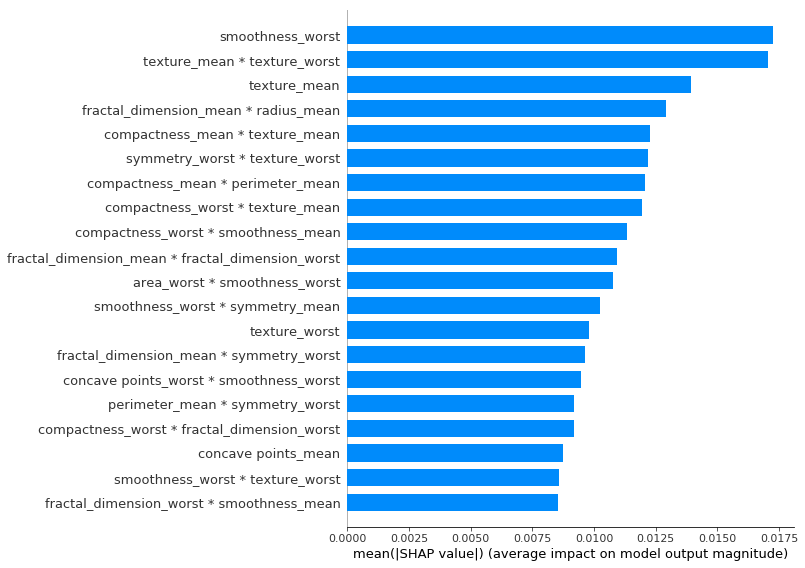

In [19]:
import shap

explainer = shap.TreeExplainer(RandomForestClassifier().fit(X,y)) # Create object that can calculate shap values
shap_values = explainer.shap_values(X) 

shap.summary_plot(shap_values[1], X, feature_names=feature_names,plot_type="bar")

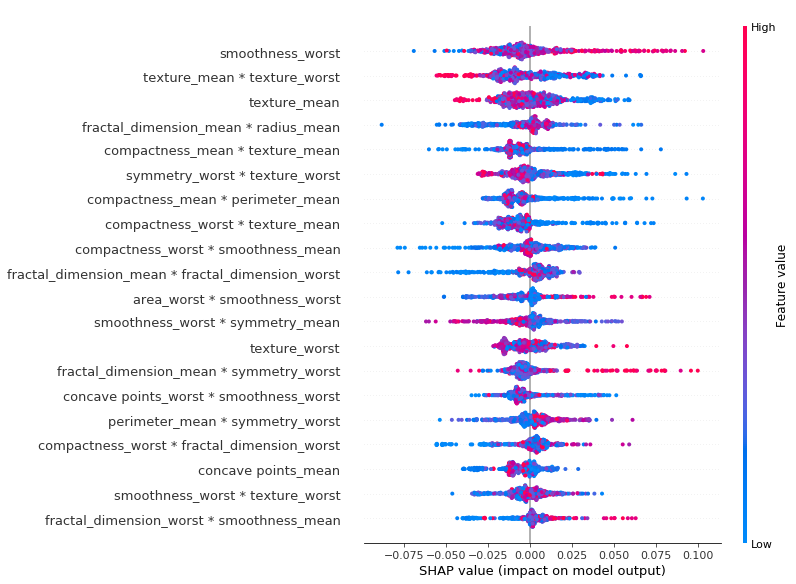

In [20]:
shap.summary_plot(shap_values[1],X,feature_names=feature_names)

In [21]:
# Create dataframe of feature importance according to SHAP
shap_sum = np.abs(shap_values[1]).mean(axis=0)
df_importance = pd.DataFrame([feature_names, shap_sum.tolist()]).T
df_importance.columns = ['Features','SHAP_importance']
df_importance = df_importance.sort_values('SHAP_importance', ascending=False)
df_importance                             

,Features,SHAP_importance
14,smoothness_worst,0.0172344
167,texture_mean * texture_worst,0.0170402
1,texture_mean,0.0139116
174,fractal_dimension_mean * radius_mean,0.0129266
203,compactness_mean * texture_mean,0.0122462
133,symmetry_worst * texture_worst,0.0121695
95,compactness_mean * perimeter_mean,0.0120753
34,compactness_worst * texture_mean,0.0119441
65,compactness_worst * smoothness_mean,0.0113452
49,fractal_dimension_mean * fractal_dimension_worst,0.0109337


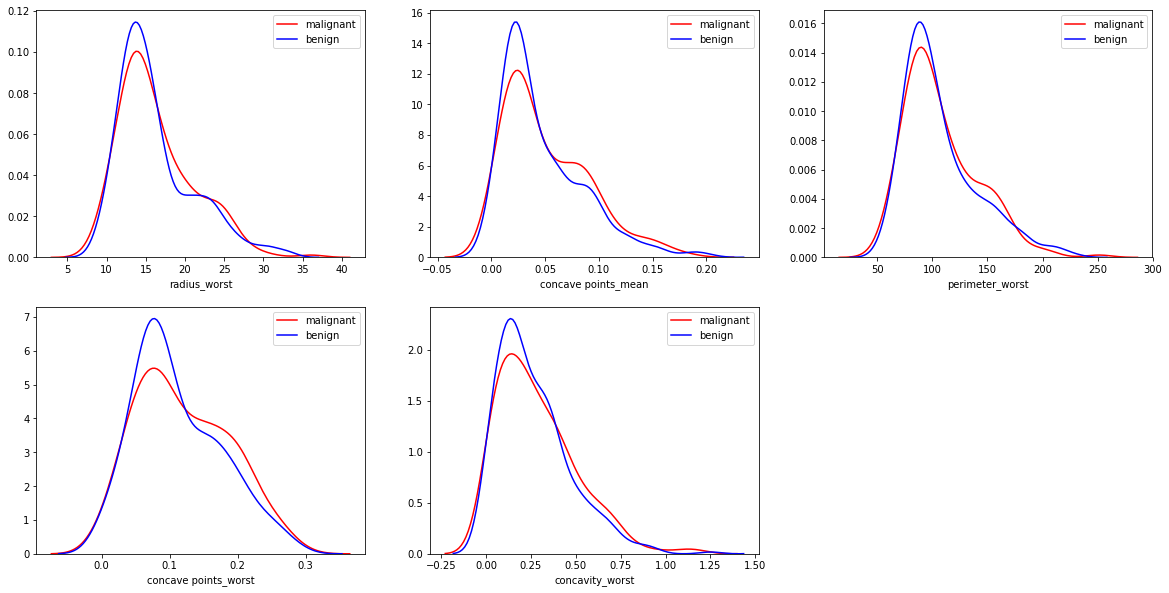

In [25]:
# Plot the distribution of top 6 features
top_features = ['radius_worst','concave points_mean','perimeter_worst','concave points_worst','concavity_worst']
feature_matrix_dropnan['diagnosis'] = df['diagnosis'].tolist()
plt.figure(figsize = (20, 10))
for i, top_feature in enumerate(top_features):
    
    # create a new subplot for each source
    plt.subplot(2, 3, i + 1)

    # KDE plot of the most impactful feature 
    sns.kdeplot(feature_matrix_dropnan.loc[feature_matrix_dropnan['diagnosis'] == 'M',top_feature],color='red',label = 'malignant')
    sns.kdeplot(feature_matrix_dropnan.loc[feature_matrix_dropnan['diagnosis'] == 'B',top_feature],color='blue', label = 'benign')

    # Labeling of plot
    plt.xlabel(top_feature)


### Distribution of the most impactful features

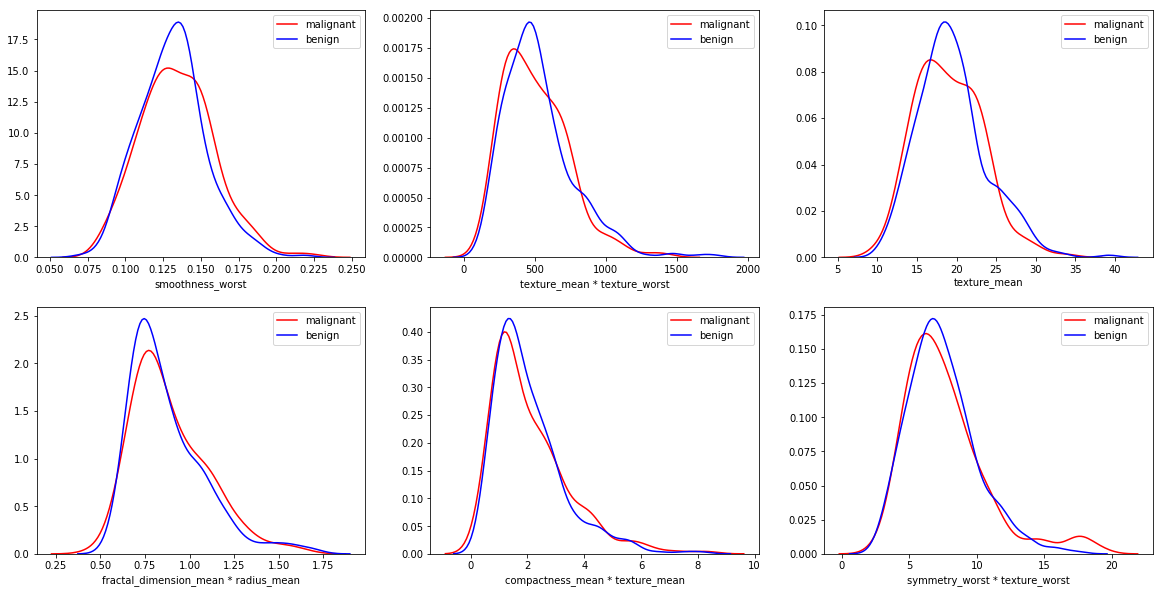

In [23]:
# Plot the distribution of top 6 features
top_features = df_importance.head(6)['Features'].tolist()
feature_matrix_dropnan['diagnosis'] = df['diagnosis'].tolist()
plt.figure(figsize = (20, 10))
for i, top_feature in enumerate(top_features):
    
    # create a new subplot for each source
    plt.subplot(2, 3, i + 1)

    # KDE plot of the most impactful feature 
    sns.kdeplot(feature_matrix_dropnan.loc[feature_matrix_dropnan['diagnosis'] == 'M',top_feature],color='red',label = 'malignant')
    sns.kdeplot(feature_matrix_dropnan.loc[feature_matrix_dropnan['diagnosis'] == 'B',top_feature],color='blue', label = 'benign')

    # Labeling of plot
    plt.xlabel(top_feature)


### Distribution of the least impactful features

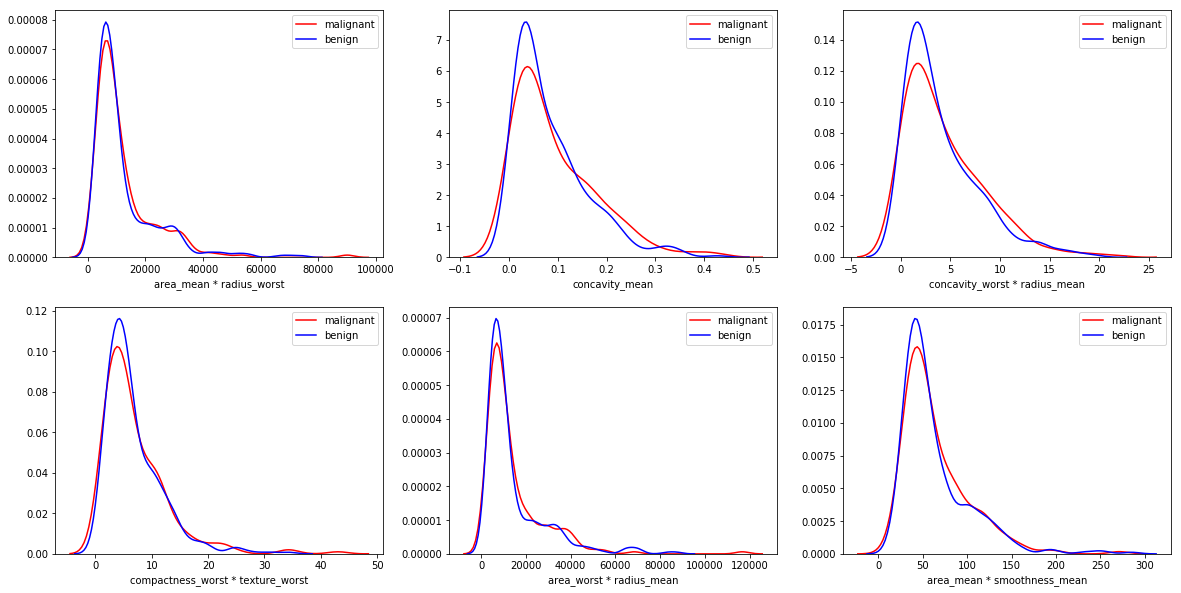

In [24]:
# Plot the distribution of top 6 features
top_features = df_importance.tail(6)['Features'].tolist()
feature_matrix_dropnan['diagnosis'] = df['diagnosis'].tolist()
plt.figure(figsize = (20, 10))
for i, top_feature in enumerate(top_features):
    
    # create a new subplot for each source
    plt.subplot(2, 3, i + 1)

    # KDE plot of the most impactful feature 
    sns.kdeplot(feature_matrix_dropnan.loc[feature_matrix_dropnan['diagnosis'] == 'M',top_feature],color='red',label = 'malignant')
    sns.kdeplot(feature_matrix_dropnan.loc[feature_matrix_dropnan['diagnosis'] == 'B',top_feature],color='blue', label = 'benign')

    # Labeling of plot
    plt.xlabel(top_feature)


The results suggested introducing these addition features with featuretools does not improve the performance.

#### Reason 1: overfitting
To test if the model was overfit, I calculated the accuracy of model in predicting training data: